# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [3]:
data = pd.read_csv('weight-height.csv')
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [7]:
male_df =  data[data['Gender'] == 'Male']
male_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909


In [8]:
female_df =  data[data['Gender'] == 'Female']
female_df

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [12]:
male_df.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


In [10]:
female_df.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

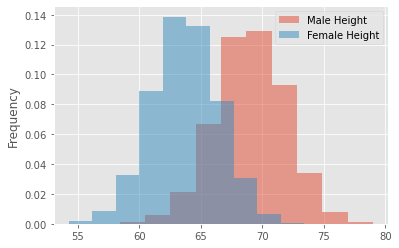

In [13]:
male_df['Height'].plot.hist(bins=10, density=True, alpha=.5, label='Male Height')
female_df['Height'].plot.hist(bins=10, density=True, alpha=.5, label='Female Height')
plt.legend()
plt.show();

In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

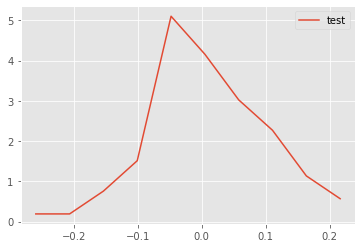

In [14]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = .5*(bins[k] + bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy
    


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

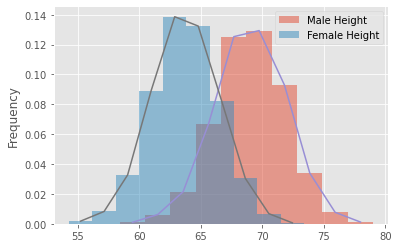

In [15]:
male_df['Height'].plot.hist(bins=10, density=True, alpha=.5, label='Male Height')
female_df['Height'].plot.hist(bins=10, density=True, alpha=.5, label='Female Height')

plt.legend()
x,y = density(male_df['Height'])
plt.plot(x,y)
x,y = density(female_df['Height'])
plt.plot(x,y)
plt.show()

## Repeat the above exercise for male and female weights

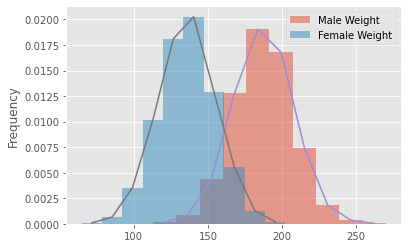

In [16]:
male_df['Weight'].plot.hist(bins=10, density=True, alpha=.5, label='Male Weight')
female_df['Weight'].plot.hist(bins=10, density=True, alpha=.5, label='Female Weight')

plt.legend()
x,y=density(male_df['Weight'])
plt.plot(x,y)
x,y=density(female_df['Weight'])
plt.plot(x,y)
plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

In [18]:
import seaborn as sns

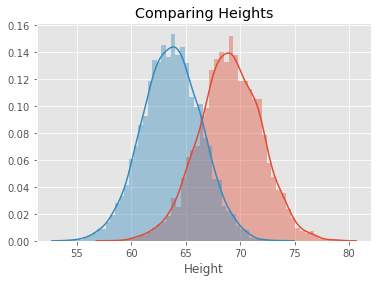

In [20]:
sns.distplot(male_df['Height'])
sns.distplot(female_df['Height'])
plt.title('Comparing Heights')
plt.show()

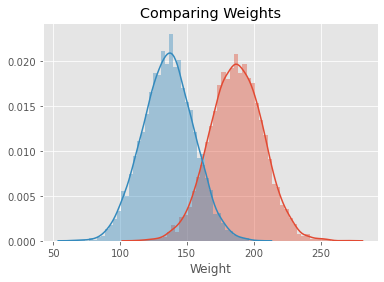

In [22]:
sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])
plt.title('Comparing Weights')
plt.show()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.